<h3>COMPUTAÇÃO QUÂNTICA</h3>
<hr>
<h4>Regressão de Dados Estruturados</h4>

<h5>Importação das Classes e Instanciação dos Objetos</h5>

In [2]:
# importação das classes que serão instanciadas como objeto
from Neuraline.QuantumPhysics.quantum_computing import QUANTUM_COMPUTER # classe de acesso ao computador quântico
from Neuraline.QuantumPhysics.quantum_computing import QuantumCircuit # classe para construção do circuito quântico
from Neuraline.Utilities.data import DataTable, DataExploration # classes para leitura e exploração de dados
from Neuraline.Utilities.chart import Chart # classe para plotagem de dados gráficos
data_table, data_exploration, chart = DataTable(), DataExploration(), Chart() # instanciação dos objetos das classes

<h5>Exibição dos Dados no Formato CSV</h5>

In [4]:
# endereço remoto do arquivo csv com os dados climáticos do planeta
url_data = 'https://pkgstore.datahub.io/core/global-temp/annual_csv/data/a26b154688b061cdd04f1df36e4408be/annual_csv.csv'
result = data_table.visualization_csv_inline( # visualização dos dados em estrutura tabular
    url_path=url_data, # atribuição do endereço do arquivo de dados
    limit=10 # limite de registros a serem exibidos para não poluir a tela
)
# Source: fonte da informação
# Year: ano em que a temperatura média foi calculada
# Mean: temperatura média do planeta em graus celsius

╒══════════╤════════╤════════╕
│ Source   │   Year │   Mean │
╞══════════╪════════╪════════╡
│ GCAG     │   2016 │ 0.9363 │
├──────────┼────────┼────────┤
│ GISTEMP  │   2016 │ 0.99   │
├──────────┼────────┼────────┤
│ GCAG     │   2015 │ 0.8998 │
├──────────┼────────┼────────┤
│ GISTEMP  │   2015 │ 0.87   │
├──────────┼────────┼────────┤
│ GCAG     │   2014 │ 0.7408 │
├──────────┼────────┼────────┤
│ GISTEMP  │   2014 │ 0.74   │
├──────────┼────────┼────────┤
│ GCAG     │   2013 │ 0.6679 │
├──────────┼────────┼────────┤
│ GISTEMP  │   2013 │ 0.65   │
├──────────┼────────┼────────┤
│ GCAG     │   2012 │ 0.624  │
├──────────┼────────┼────────┤
│ GISTEMP  │   2012 │ 0.63   │
╘══════════╧════════╧════════╛


<h5>Separação dos Dados em Treinamento e Teste</h5>

In [9]:
# separa um percentual dos dados para teste e outro para treinamento
x_training, y_training, x_test, y_test = data_exploration.dataSeparationCSV( # separação dos dados em listas
    url_path=url_data, # atribuição do endereço do arquivo de dados
    list_inputs=['Year'], # título da coluna de entrada
    list_outputs=['Mean'], # título da coluna de saída
    training_percentage=.5, # 50% dos dados para treinamento
    test_percentage=.5 # 50% dos dados para teste
)

<h5>Plotagem Gráfica dos Dados de Treinamento e Teste</h5>

Dados de Treino:


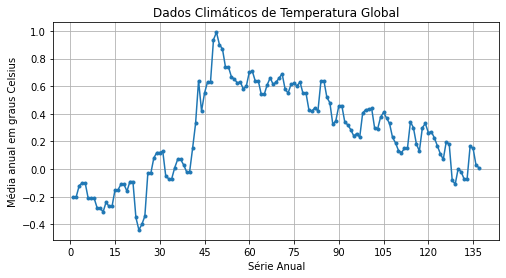

Dados de Teste:


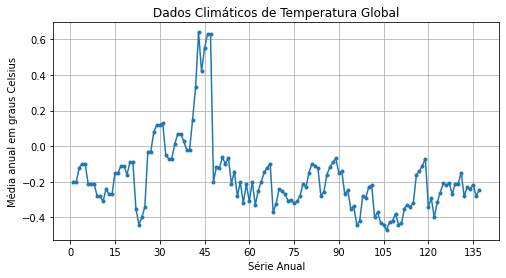

In [11]:
print('Dados de Treino:') # mensagem descritiva para os dados de treinamento
chart.plotLINE( # plotagem do gráfico de linha com os dados de treinamento
    y=y_training, # atribuição da lista de valores do eixo y (vertical)
    x_label='Série Anual', # descrição do eixo x (horizontal)
    y_label='Média anual em graus Celsius', # descrição do eixo y (vertical)
    title='Dados Climáticos de Temperatura Global' # descrição/título do gráfico
)
print('Dados de Teste:') # mensagem descritiva para os dados de teste
chart.plotLINE( # plotagem do gráfico de linha com os dados de teste
    y=y_test, # atribuição da lista de valores do eixo y (vertical)
    x_label='Série Anual', # descrição do eixo x (horizontal)
    y_label='Média anual em graus Celsius', # descrição do eixo y (vertical)
    title='Dados Climáticos de Temperatura Global' # descrição/título do gráfico
)

<h5>Construção do Circuito Quântico</h5>

In [13]:
quantum_circuit = QuantumCircuit( # instanciação do objeto do circuito
    architecture=QUANTUM_COMPUTER # arquitetura de acesso remoto ao computador quântico real
)
quantum_circuit.setQubits(nqubits=5) # seta 5 qubits (bits quânticos) na construção do circuito
# código de treinamento do circuito quântico
for x in x_training: quantum_circuit.addInputData(data=x) # atribuição das amostras de entrada
for y in y_training: quantum_circuit.addOutputData(data=y) # atribuição das amostras de saída
# código de inserção dos barramentos quânticos
result1 = quantum_circuit.addEncoderBarrierX() # barramento para conversão de dados clássicos em quânticos
result2 = quantum_circuit.addDecoderBarrierY() # barramento para conversão de dados quânticos em clássicos
if result1 and result2: print('Circuito quântico construído com sucesso.') # mensagem de sucesso
else: print('Erro na construção do circuito quântico.') # mensagem de fracasso

Circuito quântico construído com sucesso.


<h5>Exibição do Circuito Quântico Montado</h5>

In [14]:
result = quantum_circuit.showCircuit() # exibição do circuito quântico
if result: print('Engenharia quântica gravada com sucesso.') # mensagem de sucesso
else: print('Erro na gravação da engenharia quântica.') # mensagem de fracasso

|Q0>: ───────|X>───|Y>───
             │     │
|Q1>: ───────|X>───|Y>───
             │     │
|Q2>: ───────|X>───|Y>───
             │     │
|Q3>: ───────|X>───|Y>───
             │     │
|Q4>: ───────|X>───|Y>───
Engenharia quântica gravada com sucesso.


<h5>Medição e Conversão do Resultado</h5>

In [15]:
predicted = [] # inicialização da lista de resultados clássicos
for x in x_test: # loop para capturar os dados de teste um a um
    quantum_circuit.measurement( # medição do estado quântico
        repetitions=1024, # número referente a quantidade de medidas
        data=x # atribuição da entrada da medição
    )
    predicted.append( # alimentação da lista de resultados clássicos
        quantum_circuit.getResult() # captura dos resultados quânticos convertidos em clássicos
    )

<h5>Plotagem do Gráfico Comparativo</h5>

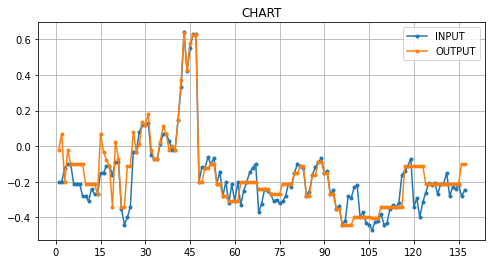

In [16]:
# plotagem comparativa entre os dados esperados (teste) com os dados preditos (resultado)
chart.plotMATRIX( # plotagem do gráfico de linhas
    matrix1=y_test, # atribuição da lista com os dados esperados (linha azul/INPUT)
    matrix2=predicted # atribuição da lista com os dados preditos (linha laranja/OUTPUT)
)